# Visualization Day2

The exercises for Day 2 are practice techniques for telling stories with data.

# Preamble

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

# Read in data

**SNB Money-market Rate Data**

Data on the money-market rates over various terms, including: overnight (`SARON`), call money rate (`1TGT`), 1, 3, 6, and 12-month CHF-denominated loans (`1M`, `3M0`, `6M`, `12M`, respectively), and USD, JPY, GBP, and EUR-denominated loans (`3M1`, `3M2`, `3M3`, and `3M4`, respectively)

Used in Ex 1

In [3]:
snb_df = pd.read_csv("data/snb-data-zimoma-en-all-20200901_1437.csv", sep=";", skiprows=2)
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)
snb_df['Date'] = pd.to_datetime(snb_df['Date'])
snb_df = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]
snb_df

Instrument,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-0.65946,-0.850,-0.7218,-0.719,-0.5832,0.55613,-0.00300,0.59425,-0.18500,-0.5600,-0.4410
2020-05-01,-0.65962,-0.850,-0.7610,-0.734,-0.6510,0.34400,-0.04083,0.22775,-0.34657,-0.5972,-0.4776
2020-06-01,-0.66239,-0.900,-0.7674,-0.734,-0.6760,0.30200,-0.04717,0.14088,-0.42200,-0.6264,-0.4724


**MPG Data**

Data about a selection of automobiles in two years: 1999 and 2008. Includes information about the manufacturer and model of each car, as well as data on the type of car (`class`), the size of the engine (`displ`, `cyl`), the type of transmission (`trans`), and city and highway fuel efficiency (`cty`, `hwy`) in miles/gallon of fuel units.

Used in Ex 2, 3

In [4]:
mpg_df = pd.read_csv("data/mpg.csv")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


**Anscombe's Quartet**

Synthetic data with some strange properties, made up of four data sets. Contains three columns, `dataset`, to identify which dataset each row belongs to, and `x`, and `y` values.

Used in Ex 4

In [5]:
anscombe_df = pd.read_csv('data/anscombe.csv')
anscombe_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


**Mortality Data**

Data on the daily number of deaths in France from 1 Jan, 2000 to 18 May, 2020. The columns `month` and `day` are the month and day of the data, the columns 2000-2020 are the data for those years.

Used in Ex 5

In [6]:
mort_df = pd.read_csv('data/morts_2020-05-18.csv')
month_day_df = mort_df['mois_jour'].str.split("/", expand=True)
month_day_df.columns = ['month', 'day']
month_day_df = month_day_df.astype('int32')
mort_df = month_day_df.join(mort_df)
# Get rid of Feb 29, we can ignore it
mort_df = mort_df.dropna(axis=0, subset=['2001'])
mort_df.head()

,month,day,mois_jour,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1,01/01,1974,1670.0,1886.0,1640.0,1798,1757.0,1699.0,...,1819.0,1813,1874.0,1701.0,1877.0,1761,2204.0,2027.0,1839,1895.0
1,1,2,01/02,2040,1777.0,1927.0,1801.0,1829,1537.0,1765.0,...,1810.0,1754,1872.0,1780.0,1972.0,1797,2371.0,2142.0,1935,1892.0
2,1,3,01/03,2086,1775.0,1850.0,1701.0,1807,1672.0,1813.0,...,1881.0,1743,1866.0,1712.0,1958.0,1726,2352.0,2137.0,1880,1940.0
3,1,4,01/04,2080,1701.0,1887.0,1605.0,1701,1679.0,1720.0,...,1814.0,1762,1803.0,1693.0,1856.0,1835,2251.0,2160.0,1900,1821.0
4,1,5,01/05,2039,1697.0,1792.0,1569.0,1901,1665.0,1661.0,...,1875.0,1757,1748.0,1618.0,1978.0,1778,2272.0,2099.0,1921,1734.0


## Ex. 1: Layering

Layering can be used to provide context necessary for interpreting data. We are going to take the line chart from yesterday and layer context onto the chart.

### Ex. 1.1

The snb_df includes a `1TGT` column for of rates for tomorrow-next loans. Plot a line chart of this column, and layer the following events and data on top of the chart.

* 1973-11: Oil Price Shock
* 1991-01 – 1993-12: Recession in Switzerland
* 2009-01 – 2009-12: Recession in Switzerland
* 2008-09: Lehman-Brothers collapse
* 2011-08: Introduction of CHF/EUR floor
* 2015-01: Removal of CHF/EUR floor

(Matplotlib documentation for [annotations](http://matplotlib.org/users/annotations.html) and [axvspan](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvspan.html) will be helpful here.)


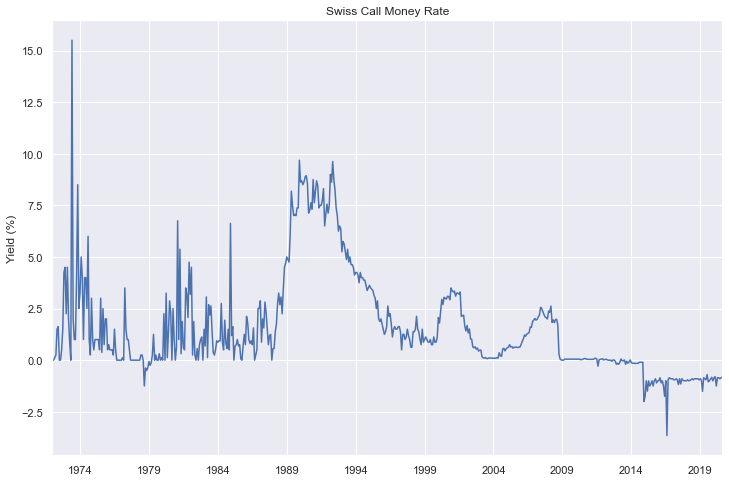

In [7]:
# Here is the initial plot to get you started
# Add the events to this plot
fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)");

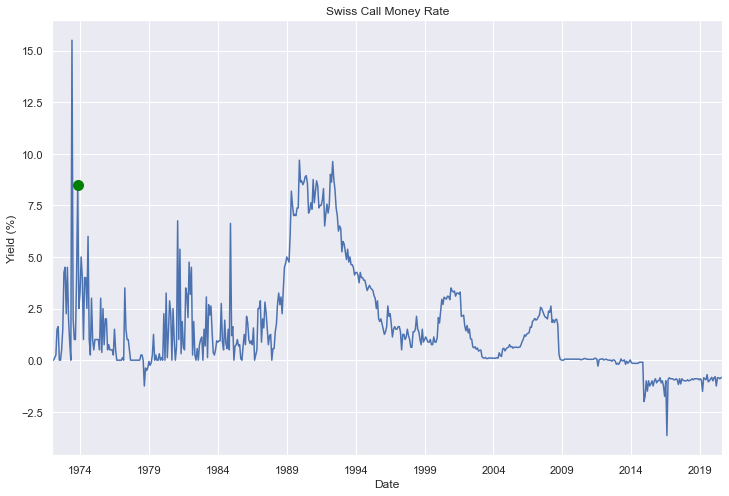

In [8]:
# These first lines are the same that the code above
fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01 = snb_df[snb_df.index == "1973-11"]['1TGT']

a_TGT_1973_01.plot(kind="line", style="o", ms=10, c="green", label='Introduction of CHF/EUR');

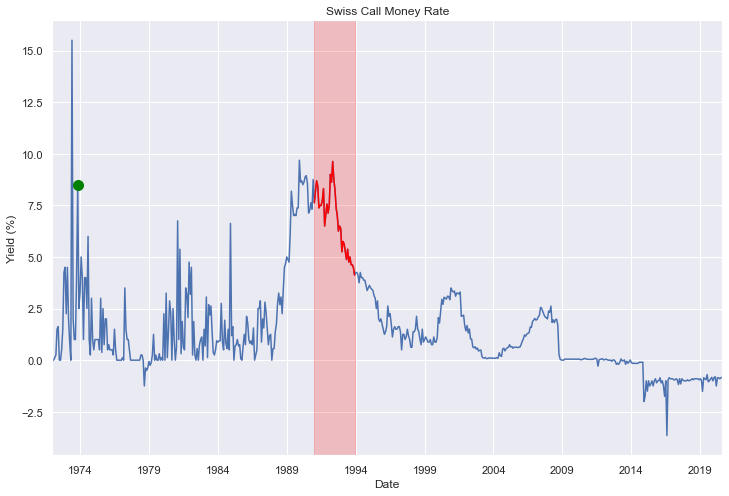

In [9]:
# 1973-11: Oil Price Shock
# 1991-01 – 1993-12: Recession in Switzerland
fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=10, c="green", label='Introduction of CHF/EUR')

# 1991-01 – 1993-12: Recession in Switzerland
    # dataframe
b_recession = snb_df[(snb_df.index.year >= 1991) & (snb_df.index.year <= 1993)]
    # plotting
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

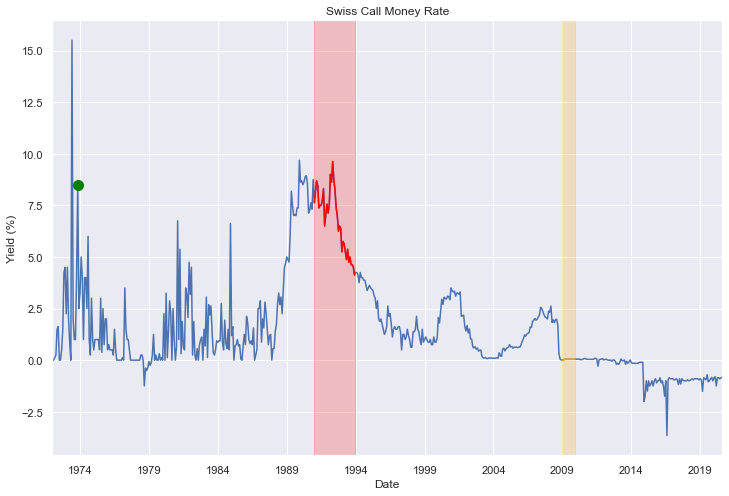

In [10]:
# 1973-11: Oil Price Shock
# 1991-01 – 1993-12: Recession in Switzerland
# 2009-01 – 2009-12: Recession in Switzerland
fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=10, c="green", label='Introduction of CHF/EUR')

# 1991-01 – 1993-12: Recession in Switzerland
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

# 2009-01 – 2009-12: Recession in Switzerland
    # dataframe
c_recession = snb_df[(snb_df.index.year == 2009)]
    # plotting
c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)


<AxesSubplot:title={'center':'Swiss Call Money Rate'}, xlabel='Date', ylabel='Yield (%)'>

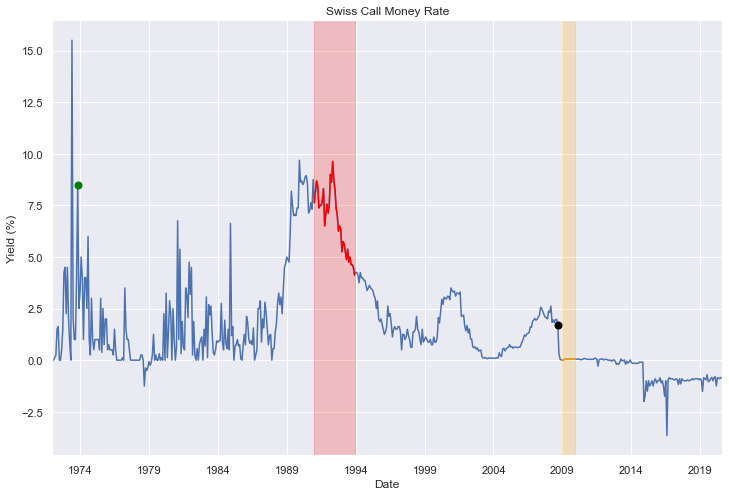

In [11]:
# 1973-11: Oil Price Shock
# 1991-01 – 1993-12: Recession in Switzerland
# 2009-01 – 2009-12: Recession in Switzerland
# 2008-09: Lehman-Brothers collapse
fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

# 1991-01 – 1993-12: Recession in Switzerland
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

# 2009-01 – 2009-12: Recession in Switzerland
c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)

# 2008-09: Lehman-Brothers collapse
    # dataframe
d_collapse = snb_df[(snb_df.index == "2008-09")]
    # plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')



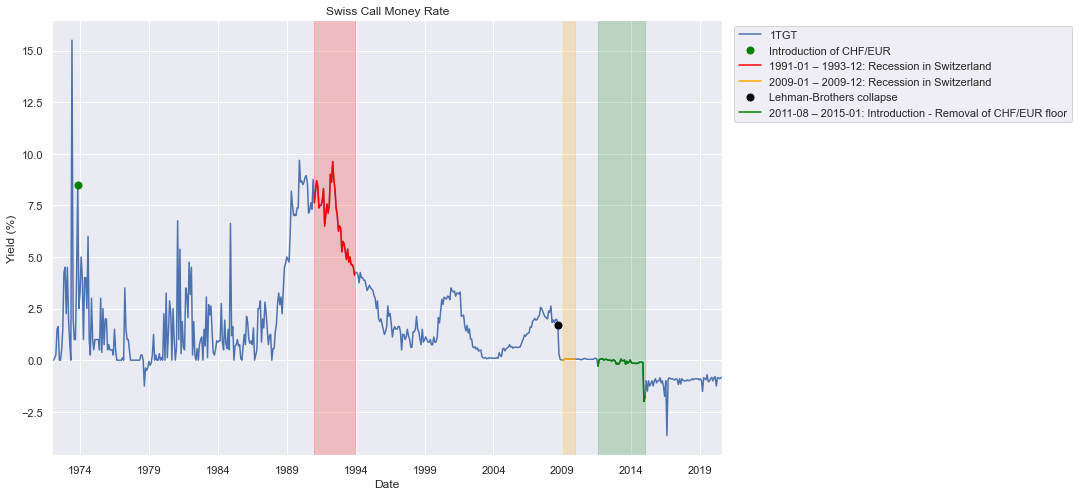

In [12]:
# 1973-11: Oil Price Shock
# 1991-01 – 1993-12: Recession in Switzerland
# 2009-01 – 2009-12: Recession in Switzerland
# 2008-09: Lehman-Brothers collapse
# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor

fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

# 1991-01 – 1993-12: Recession in Switzerland
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

# 2009-01 – 2009-12: Recession in Switzerland
c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)

# 2008-09: Lehman-Brothers collapse
    # plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')

# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor
    # dataframe
e_CHF = c_recession = snb_df[(snb_df.index >= '2011-08') & (snb_df.index <= '2015-01')]
    # plotting
e_CHF["1TGT"].plot(kind="line", c="green", label='2011-08 – 2015-01: Introduction - Removal of CHF/EUR floor')
ax.axvspan("2011-08", "2015-01", color="green", alpha=0.2)

ax.legend(bbox_to_anchor=(1.01, 1), loc=2);

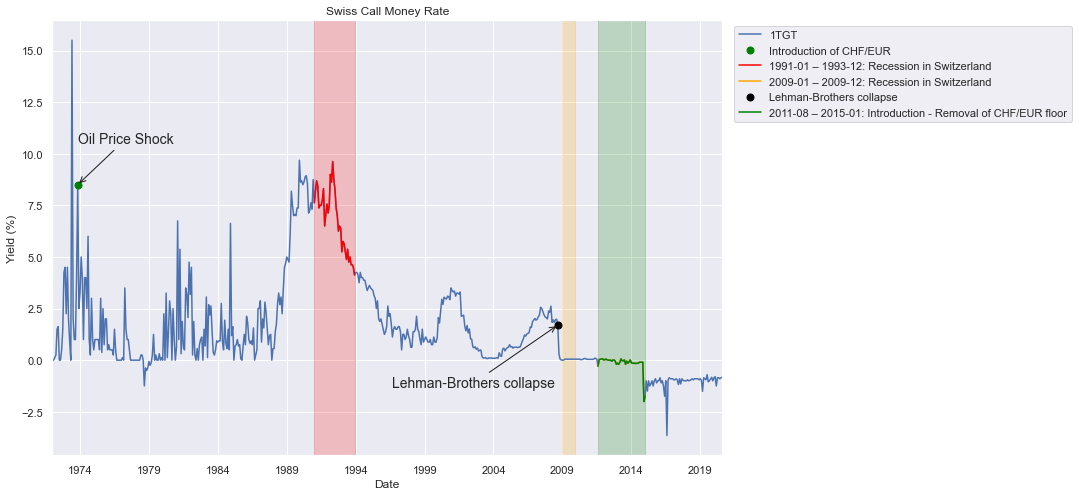

In [13]:
# With anotations

fig, ax = plt.subplots(figsize=(12, 8))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

arrow_x = str(a_TGT_1973_01.index[0])
arrow_y = a_TGT_1973_01
text_x = str(a_TGT_1973_01.index[0])
text_y = arrow_y + 2
ax.annotate('Oil Price Shock', xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)

# 1991-01 – 1993-12: Recession in Switzerland
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

# 2009-01 – 2009-12: Recession in Switzerland
c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)

# 2008-09: Lehman-Brothers collapse
    # plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')

arrow_xd = str(d_collapse.index[0])
arrow_yd = d_collapse["1TGT"]
text_xd = "1996-09"
text_yd = arrow_yd - 3
ax.annotate('Lehman-Brothers collapse', xy=(arrow_xd, arrow_yd), xytext=(text_xd, text_yd), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor
    # dataframe
e_CHF = c_recession = snb_df[(snb_df.index >= '2011-08') & (snb_df.index <= '2015-01')]
    # plotting
e_CHF["1TGT"].plot(kind="line", c="green", label='2011-08 – 2015-01: Introduction - Removal of CHF/EUR floor')
ax.axvspan("2011-08", "2015-01", color="green", alpha=0.2)

ax.legend(bbox_to_anchor=(1.01, 1), loc=2);



### Ex 1.2

Save the plot made in 1.1 as a PDF file.

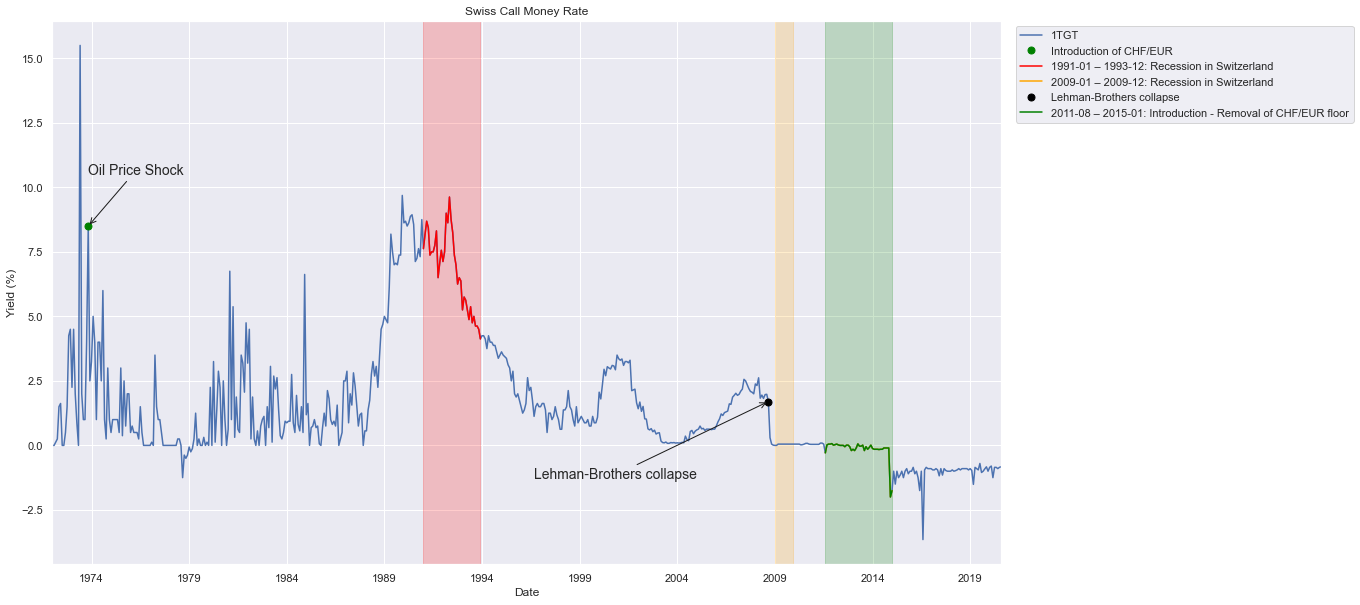

In [14]:
fig, ax = plt.subplots(figsize=(17, 10))
ser = snb_df['1TGT']
ser.plot(ax=ax)
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

arrow_x = str(a_TGT_1973_01.index[0])
arrow_y = a_TGT_1973_01
text_x = str(a_TGT_1973_01.index[0])
text_y = arrow_y + 2
ax.annotate('Oil Price Shock', xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)

# 1991-01 – 1993-12: Recession in Switzerland
b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);

# 2009-01 – 2009-12: Recession in Switzerland
c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)

# 2008-09: Lehman-Brothers collapse
    # plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')

arrow_xd = str(d_collapse.index[0])
arrow_yd = d_collapse["1TGT"]
text_xd = "1996-09"
text_yd = arrow_yd - 3
ax.annotate('Lehman-Brothers collapse', xy=(arrow_xd, arrow_yd), xytext=(text_xd, text_yd), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor
    # dataframe
e_CHF = c_recession = snb_df[(snb_df.index >= '2011-08') & (snb_df.index <= '2015-01')]
    # plotting
e_CHF["1TGT"].plot(kind="line", c="green", label='2011-08 – 2015-01: Introduction - Removal of CHF/EUR floor')
ax.axvspan("2011-08", "2015-01", color="green", alpha=0.2)

ax.legend(bbox_to_anchor=(1.01, 1), loc=2);

plt.rc('pdf',fonttype=42)
plt.savefig('Swiss_economy.pdf')

### Ex 2: More Layering

### Ex 2.1

For this exercise, we will use the `mpg_df` dataframe. We will start with a scatterplot with `displ` on the x-axis and `hwy` on the y-axis. 

For the car or cars with the best and worst highway fuel milage, plot the data points observing:
- Use [Brewer Set1](https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=7) green for the best (#4DAF4A) and the red for the worst (#E41A1C)
- Make the dot size larger (10 points, s = 100)
- Label the point with manufacturer(s) of automobile (column `manufacturer` in the dataframe)


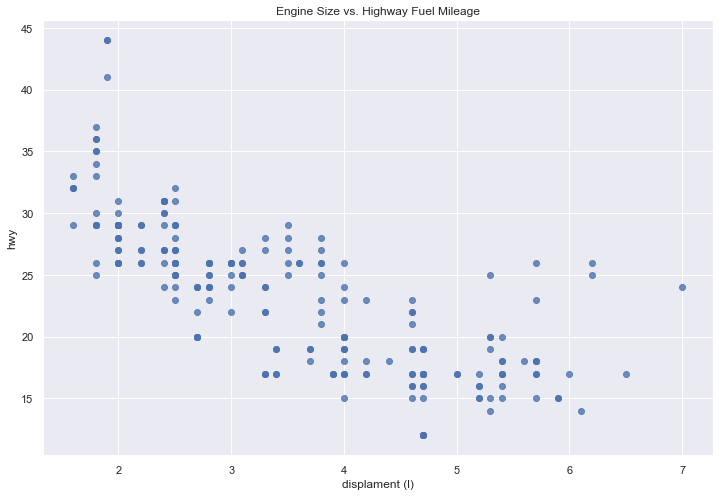

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("displament (l)")
ax.set_ylabel("hwy");

Step 1, identify the cars with the best and worst fuel mileage, and their manufacturers

In [16]:
# try to solve this yourself. If you are stuck, uncomment the next line and execute this cell
# %load fragment-2.1.1.py
# hwy (milles/gallon) more is better
best_df = mpg_df[mpg_df['hwy'] == max(mpg_df['hwy'])].reset_index(drop=True)
best_df_u = best_df["manufacturer"].unique()
best_df_u 

array(['volkswagen'], dtype=object)

In [17]:
worst_df = mpg_df[mpg_df['hwy'] == min(mpg_df['hwy'])].reset_index(drop=True)
worst_df_u = worst_df["manufacturer"].unique()
worst_df_u

array(['dodge', 'jeep'], dtype=object)

Step 2, plot the full plot together with the best/worst cars and labels for the manufacturers

Text(4.8, 11.5, 'jeep')

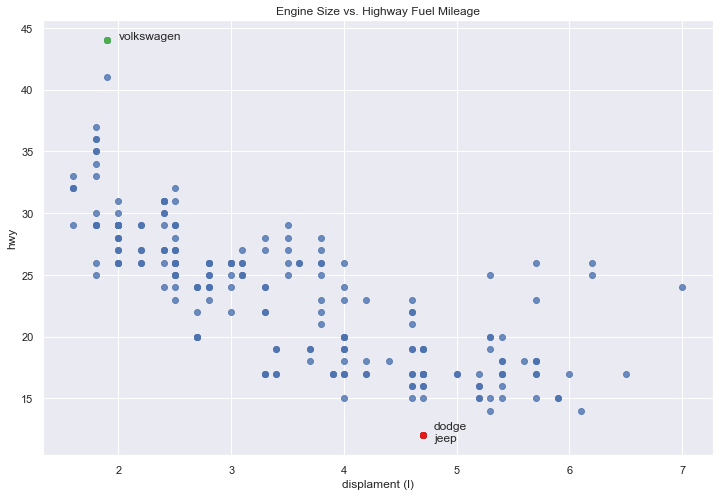

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("displament (l)")
ax.set_ylabel("hwy");

# Use Brewer Set1 green for the best (#4DAF4A) and the red for the worst (#E41A1C)
# Make the dot size larger (10 points, s = 100)
# Label the point with manufacturer(s) of automobile (column manufacturer in the dataframe)

ax.scatter(best_df['displ'], best_df['hwy'], color ="#4DAF4A", alpha=0.9)
ax.annotate(xy=[best_df['displ'][0] + 0.1, best_df["hwy"][0] + 0.1], text=best_df_u[0])

ax.scatter(worst_df['displ'], worst_df['hwy'], color ="#E41A1C", alpha=0.9)
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] + 0.5], text=worst_df_u[0])
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] - 0.5], text=worst_df_u[1])


### Ex 2.2

Starting with the plot from 2.1, draw a linear model of the relationship between displacement and highway mileage in Brewer Set1 orange (#ff7f00) over the plot. Label the line with the $r^2$ of the model.

Step 1, build a linear model of `hwy` as a function of `displ`

In [19]:
import statsmodels.formula.api as smf

def fit_and_predict(df):
    # fit a model explaining hwy fuel mileage through displacement
    lm = smf.ols(formula="hwy ~ displ", data=df).fit()
    
    # find two points on the line represented by the model
    x_bounds = [df['displ'].min(), df['displ'].max()]
    preds_input = pd.DataFrame({'displ': x_bounds})
    predictions = lm.predict(preds_input)
    return lm, pd.DataFrame({'displ': x_bounds, 'hwy': predictions})


lm, pred = fit_and_predict(mpg_df)
rsquared = lm.rsquared

Step 2, draw the plot and add a line of the model

Text(7.0, 11.483529408662125, 'R2 = 0.5867866723989039')

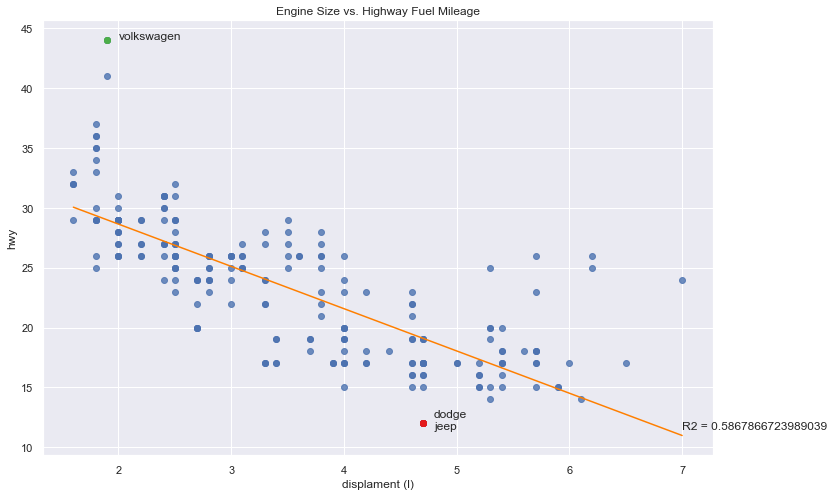

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("displament (l)")
ax.set_ylabel("hwy");

# Use Brewer Set1 green for the best (#4DAF4A) and the red for the worst (#E41A1C)
# Make the dot size larger (10 points, s = 100)
# Label the point with manufacturer(s) of automobile (column manufacturer in the dataframe)

ax.scatter(best_df['displ'], best_df['hwy'], color ="#4DAF4A", alpha=0.9)
ax.annotate(xy=[best_df['displ'][0] + 0.1, best_df["hwy"][0] + 0.1], text=best_df_u[0])

ax.scatter(worst_df['displ'], worst_df['hwy'], color ="#E41A1C", alpha=0.9)
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] + 0.5], text=worst_df_u[0])
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] - 0.5], text=worst_df_u[1])

ax.plot(pred["displ"], pred["hwy"], c="#ff7f00")
ax.annotate(xy=[pred["displ"][1], pred["hwy"][1] + 0.5], text="R2 = {}".format(rsquared))

## Ex. 3: Faceting

Faceting can be used to show more data, provide context, and make a visualization easier to undersatand.

### Ex 3.1

Using the mpg_df dataframe, scatterplot `displ` on the x-axis and `hwy` on the y-axis, facet by class of car (the `class` column). Give the figure the title (`suptitle`), `Engine Size vs. Highway Fuel Mileage`, and label the y-axis `MPG` and x-axis `Displacement (Liters)`.

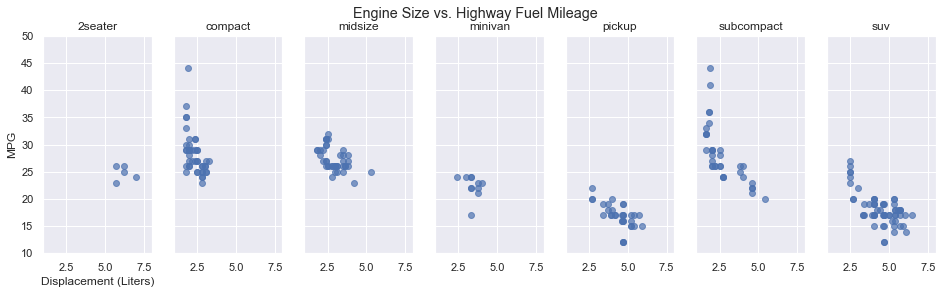

In [21]:
# faceting = grouping by...
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)

# separate the data in different data frames
for i, (name, group) in enumerate(mpg_df.groupby('class')):
    ax = axs[i]
    ax.scatter(group['displ'], group['hwy'], alpha=0.7, label=name)
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if i < 1:
        ax.set_ylabel('MPG')
        ax.set_xlabel('Displacement (Liters)')
fig.suptitle("Engine Size vs. Highway Fuel Mileage");

### Ex 3.2

Make the same plot as in 3.1, but this time **sort the facets** by the mean displacement for each class.

In [22]:
mpg_df.groupby('class')

In [23]:
new_mpg_df = mpg_df.groupby('class').mean()["displ"].sort_values()
new_mpg_df 

class
compact       2.325532
subcompact    2.660000
midsize       2.921951
minivan       3.390909
pickup        4.418182
suv           4.456452
2seater       6.160000
Name: displ, dtype: float64

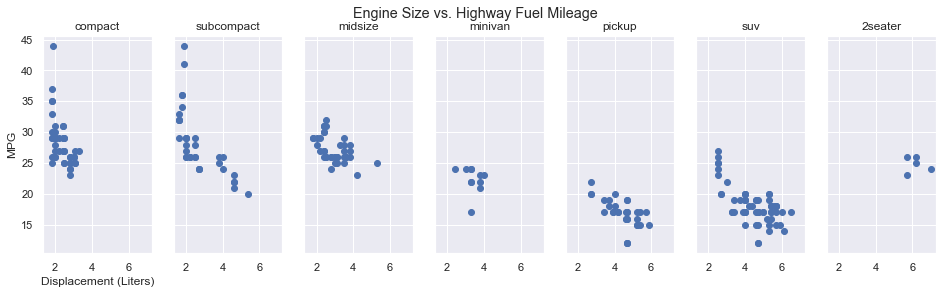

In [24]:
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)

for i, value in enumerate(new_mpg_df.index):
    df = mpg_df[mpg_df["class"] == value]
    axs[i].scatter(df['displ'], df['hwy'])
    axs[i].set_title(value)
    if i < 1:
        axs[i].set_ylabel('MPG')
        axs[i].set_xlabel('Displacement (Liters)')

fig.suptitle("Engine Size vs. Highway Fuel Mileage");

### Ex 3.3

Make the same plot as in 3.2, but this time highlight the car or cars with the best and worst fuel mileage, as was done in 2.1, and draw in the linear model from 2.2. That is:

For the car or cars with the best and worst highway fuel milage, plot the data points observing:
- Use Brewer Set1 blue for the best (#377EB8) and the red for the worst (#E41A1C)
- Label the point with model(s) of automobile (column `model` in the dataframe)

And draw a linear model of the relationship between displacement and highway mileage over the plot (do not add the $r^2$ as text).

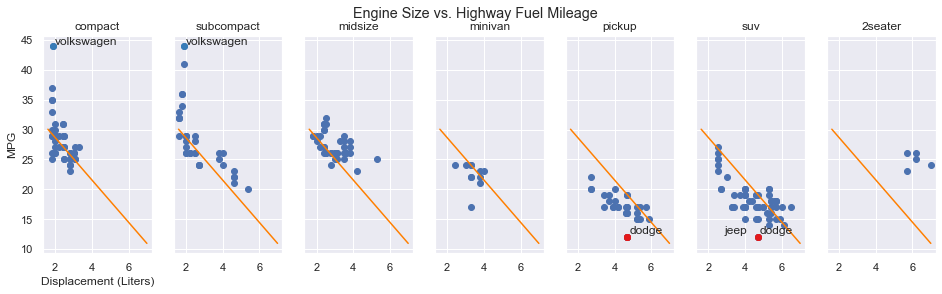

In [25]:
new_mpg_df = mpg_df.groupby('class').mean()["displ"].sort_values()
new_mpg_df 

fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)

for i, value in enumerate(new_mpg_df.index):
    df = mpg_df[mpg_df["class"] == value]
    axs[i].scatter(df['displ'], df['hwy'])
    axs[i].set_title(value)
    if i < 1:
        axs[i].set_ylabel('MPG')
        axs[i].set_xlabel('Displacement (Liters)')
    if df['hwy'].min() == worst_df['hwy'][0]:
        mn = df['hwy'].min()
        
        axs[i].scatter(df[df['hwy'].isin([mn])]['displ'], df[df['hwy'].isin([mn])]['hwy'], color ="#E41A1C", alpha=0.9)
        axs[i].annotate(xy=[df[df['hwy'].isin([mn])]['displ'].iloc[0] + 0.1, df[df['hwy'].isin([mn])]['hwy'].iloc[0] + 0.5], text=df[df['hwy'].isin([mn])]['manufacturer'].iloc[0])
        if len(df[df['hwy'].isin([mn])].groupby("manufacturer"))>1:
            axs[i].annotate(xy=[df[df['hwy'].isin([mn])]['displ'].iloc[0] - 1.8, df[df['hwy'].isin([mn])]['hwy'].iloc[0] + 0.5], text=df[df['hwy'].isin([mn])]['manufacturer'].iloc[1])
    
    
    if df['hwy'].max() == best_df['hwy'][0]:
        mx = df['hwy'].max()
        
        axs[i].scatter(df[df['hwy'].isin([mx])]['displ'], df[df['hwy'].isin([mx])]['hwy'], color ="#377EB8", alpha=0.9)
        axs[i].annotate(xy=[df[df['hwy'].isin([mx])]['displ'].iloc[0] + 0.1, df[df['hwy'].isin([mx])]['hwy'].iloc[0] + 0.1], text=df[df['hwy'].isin([mx])]['manufacturer'].iloc[0])
        if len(df[df['hwy'].isin([mx])].groupby("manufacturer"))>1:
            axs[i].annotate(xy=[df[df['hwy'].isin([mx])]['displ'].iloc[0] + 0.1,df[df['hwy'].isin([mx])]['hwy'].iloc[0] + 0.1], text=df[df['hwy'].isin([mx])]['manufacturer'].iloc[1])

    
    axs[i].plot(pred["displ"], pred["hwy"], c="#ff7f00")

fig.suptitle("Engine Size vs. Highway Fuel Mileage");



## Ex 4: Anscombe's Quartet

This exercise works with anscombe_df. 

### Ex 4.1

There are 4 data sets in the frame (indicated by the dataset column): what is the mean x, and mean y for each data set?

In [35]:
anscombe_df.groupby("dataset").mean().reset_index()

,dataset,x,y
0,I,9.0,7.500909
1,II,9.0,7.500909
2,III,9.0,7.500000
3,IV,9.0,7.500909


### Ex 4.2

Compute a linear regression for each data set. What is the slope and intercept?

Make a faceted plot, one subplot for each dataset, drawing the points at their specified x/y values. Layer the regression lines over the plot. Label the regression lines with slope, intercept, and r^2.

In [36]:
# you can use this code to compute the regression. You need to call it once for each dataset
import statsmodels.formula.api as smf

def fit_and_predict(df):
    lm = smf.ols(formula="y ~ x", data=df).fit()
    x_bounds = [df['x'].min(), df['x'].max()]
    preds_input = pd.DataFrame({'x': x_bounds})
    predictions = lm.predict(preds_input)
    return lm, pd.DataFrame({'x': x_bounds, 'y': predictions})

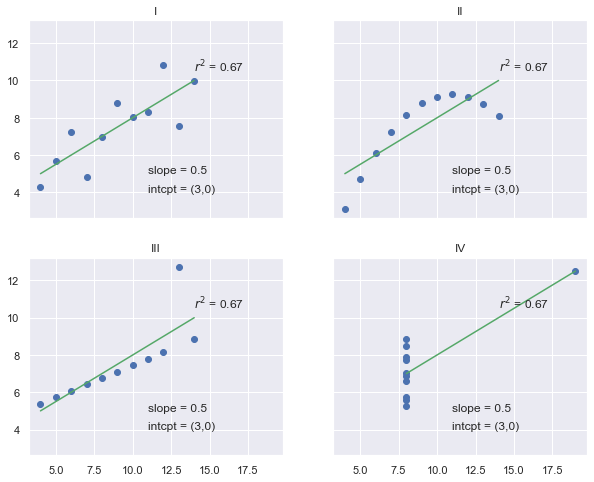

In [39]:
# We need 4 graphs because we have 4 data sets
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,8))

# I have to separate the dataframe in 4 parts and then work with each of them
for i, (name,group) in enumerate(anscombe_df.groupby("dataset")):
    col = i % 2
    row = (i - col) // 2
    ax = axs[row][col]
    ax.scatter(group['x'], group['y'])
    lm, pred = fit_and_predict(group)
    ax.plot(pred['x'], pred['y'], color="g")
    ax.text(14, 10.5, "$r^2$ = {:.2f}".format(lm.rsquared))
    ax.text(11, 5, "slope = {:.1f}".format(lm.params.x))
    ax.text(11, 4, "intcpt = ({:.0f},0)".format(lm.params.Intercept))
    ax.set_title(name)

### Ex. 4.3

*How appropriate is the linear model for each data set?*

A linear model makes sense for data set I, but is questionable for the others. It might make sense for III, but the strange outlier would need to be accounted for. II looks like it would be better modelled with a quadratic function, and something very different is going on in IV.

## Ex 5: Even More Layering

Let us recreate this fantastic graphic using the `mort_df`. For more background, see the following (all in French):
* http://coulmont.com/blog/2020/04/24/2020-une-mortalite-specifique/
* https://freakonometrics.hypotheses.org/60845
* https://www.lemonde.fr/les-decodeurs/article/2020/04/27/coronavirus-un-pic-tres-net-de-mortalite-en-france-depuis-le-1er-mars-par-rapport-aux-vingt-dernieres-annees_6037912_4355770.html

![COVID-19 in FR](http://coulmont.com/vordpress/wp-content/uploads/2020/04/deces-2001-2020-blog-general.png)

* Plot the day number in year (going from 0 to 364 or 365) on the x-axis, and the number of deaths for that each year on the y-axis.

Step 1, find the boundries for the month in the data

In [27]:
import datetime
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_cutoff = np.array([0] + days_in_month).cumsum()[:-1]
month_names = [datetime.date(2020, i+1, 1).strftime("%h") for i in range(len(days_in_month))]

In [28]:
mort_df

,month,day,mois_jour,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1,01/01,1974,1670.0,1886.0,1640.0,1798,1757.0,1699.0,...,1819.0,1813,1874.0,1701.0,1877.0,1761,2204.0,2027.0,1839,1895.0
1,1,2,01/02,2040,1777.0,1927.0,1801.0,1829,1537.0,1765.0,...,1810.0,1754,1872.0,1780.0,1972.0,1797,2371.0,2142.0,1935,1892.0
2,1,3,01/03,2086,1775.0,1850.0,1701.0,1807,1672.0,1813.0,...,1881.0,1743,1866.0,1712.0,1958.0,1726,2352.0,2137.0,1880,1940.0
3,1,4,01/04,2080,1701.0,1887.0,1605.0,1701,1679.0,1720.0,...,1814.0,1762,1803.0,1693.0,1856.0,1835,2251.0,2160.0,1900,1821.0
4,1,5,01/05,2039,1697.0,1792.0,1569.0,1901,1665.0,1661.0,...,1875.0,1757,1748.0,1618.0,1978.0,1778,2272.0,2099.0,1921,1734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,12/27,1677,1781.0,1604.0,1839.0,1579,1747.0,1672.0,...,1733.0,1751,1691.0,1827.0,1617.0,2078,2117.0,1803.0,1815,NaN
362,12,28,12/28,1575,1827.0,1617.0,1748.0,1602,1588.0,1700.0,...,1718.0,1737,1723.0,1704.0,1765.0,2124,1969.0,1856.0,1810,NaN
363,12,29,12/29,1589,1804.0,1540.0,1761.0,1647,1615.0,1700.0,...,1743.0,1762,1628.0,1811.0,1699.0,2093,1999.0,1743.0,1711,NaN
364,12,30,12/30,1682,1660.0,1645.0,1712.0,1618,1744.0,1689.0,...,1650.0,1655,1664.0,1884.0,1742.0,2102,1959.0,1756.0,1865,NaN


Step 2, plot one year of data to see what it looks like

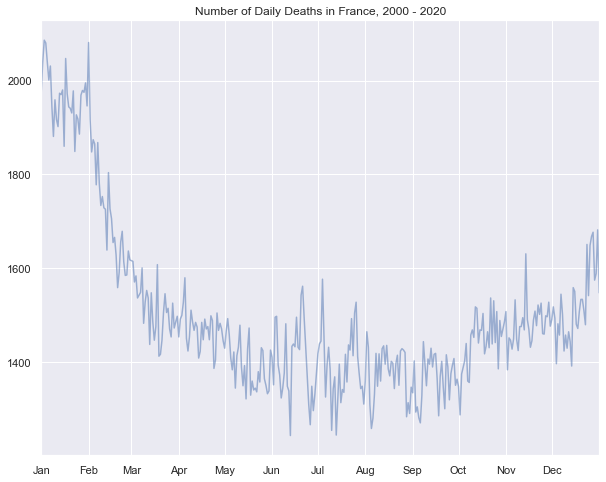

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(mort_df.index, mort_df['2000'], alpha=0.5)
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);

Step 3, plot the remaining years of data, up to 2019

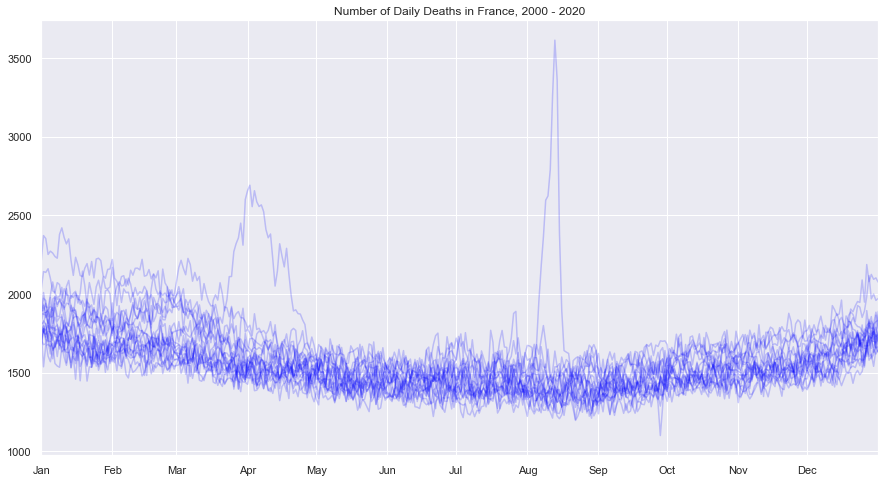

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], color="blue", alpha=0.2)

ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);

Step 4, plot the 2020 data in red and label it as the `Year 2020`

Text(115, 2051.0, 'Year 2020')

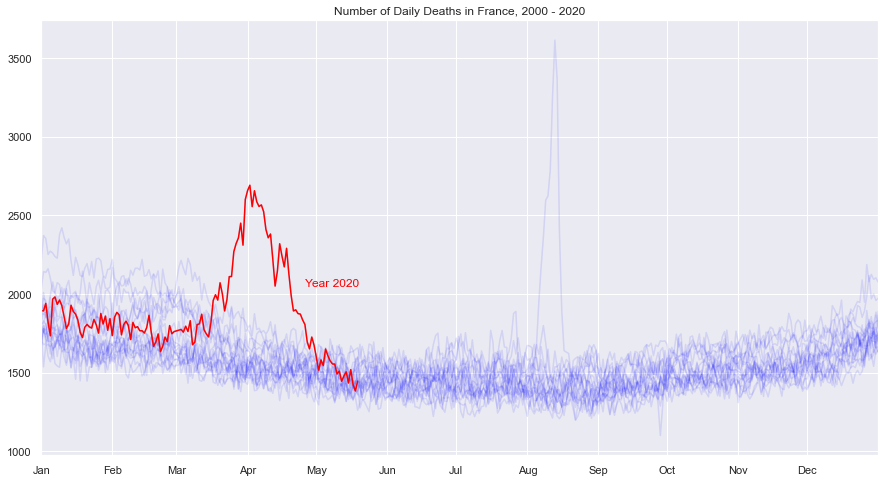

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], alpha=0.1, color="blue")
    
ax.plot(mort_df.index, mort_df["2020"], color="red")
    
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);
ax.annotate(xy=[115,mort_df["2020"][25] + 300], text="Year 2020", color = "red")



Step 5 
* label the big spike that goes over 3000 as `Heatwave, 2003`
* compute the average number of deaths per day, and layer a line with the average
* label the average line `Mean deaths, 2000-2019`

Text(280, 1200, 'Mean deaths, 2000-2019')

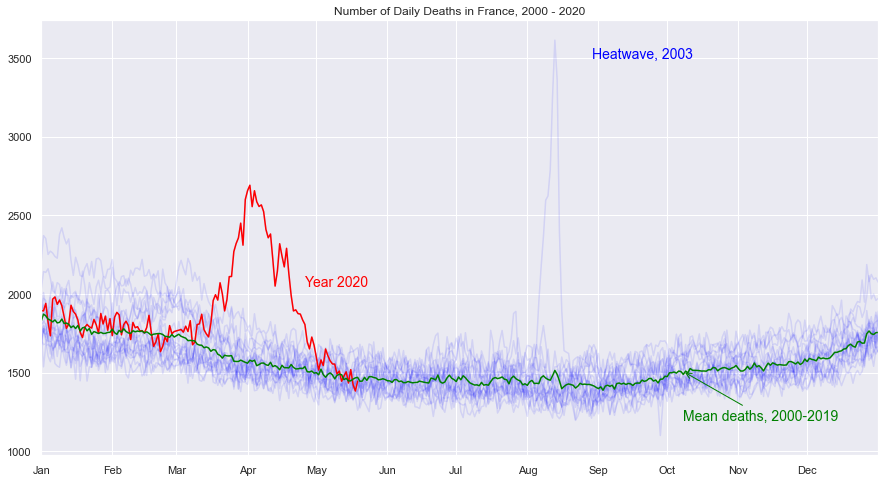

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], alpha=0.1, color="blue")
    
ax.plot(mort_df.index, mort_df["2020"], color="red")
    
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);
ax.annotate(xy=[115,mort_df["2020"][25] + 300], text="Year 2020", color = "red", fontsize=14)

ax.annotate(xy=[8 * 30 ,3500], text="Heatwave, 2003", color = "blue", fontsize=14)

normal_years = [str(year) for year in range(2000, 2020)]
mort_mean = mort_df[normal_years].mean(axis=1)
ax.plot(mort_mean, c="green")
arrow_x = mort_mean.index[9*31]
arrow_y = mort_mean[9*31]
text_x = mort_mean.index[9*31]
text_y = 1200
ax.annotate(text="Mean deaths, 2000-2019", color = "green", xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='green'), fontsize=14)



## Ex 6: Presentation

Using data from an earlier part of the course, make a PowerPoint (Keynote, Google Slides, etc.) presentation. Using what you have learned, see if you can improve any visualizations you might want to show, export them to PDF or PNG and embed them in a slide deck. 

Think about choice of typeface, layout of slides.

(
If you have nothing, use the Call Money Rate example. These links can provide context:
- https://en.wikipedia.org/wiki/Money_market
- https://www.global-rates.com/en/interest-rates/central-banks/central-bank-switzerland/snb-interest-rate.aspx
)